In [1]:
# import necessary modules 
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import loompy

# make the text in figures editable in Illustrator
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
"""function for calculating the percentage of cells expressing gene of interest"""
def percentage_exp(adata, genes):
    per_list = []
    for gene in genes:
        percentage = len(adata[adata[:, gene].X > 0.1])/len(adata.X) # calculate the percentage of cells expressing gene(s) of interest
        per_list.append((gene, percentage*100)) # add the name of gene and the percentage to list
    return sorted(per_list, key=lambda tup: tup[1], reverse = True) #rank the level of prevalence in list

"""function for calculating the number of cells expressing gene of interest"""
def number_exp(adata, genes):
    num_list = []
    for gene in genes:
        percentage = len(adata[adata[:, gene].X > 0.1])/len(adata.X)# calculate the percentage of cells expressing gene(s) of interest
        num_list.append((gene, percentage*len(adata.X))) # add the name of gene and the number of cells expressing gene of intererest
    return sorted(num_list, key=lambda tup: tup[1], reverse = True) #rank the level of prevalence in list

##
"""function for extracting the genes of interest depending on the category of receptor type from Guide to Pharmacology 'targets_and_families.csv'"""
def rec_type_list(prot_df, rec_type):
    prot_df = prot_df[prot_df['Type'] == rec_type] #isolate the data having the receptor type of interest from protein dataframe 
    prot_tuple = tuple(prot_df.loc[:,'MGI symbol'].dropna()); #making a tuple of the gene names från the protein name dataframe
    prot_list = [gene for gene in adata_w.var_names if gene.startswith(prot_tuple)] #to ensure gene in adata object, only have list with 
    return prot_list                                                              ## the genes existing in the adata object
    

"""function for calculating the number of cells belonging to specific categorical observation"""
def calc_celltype_observation(adata, observation):
    pd_adata = pd.DataFrame(index = adata.obs_names, columns = adata.var_names, data = adata.X) #convert AnnData object to a dataframe. 
    # does not work to make calculations directly onthe AnnData object
    pd_adata['obs_name'] = adata.obs[observation] #create new column in dataframe depending on the target observation in the AnnData object
    pd_celltype = pd.DataFrame(pd_adata.loc[pd_adata.index, 'obs_name']) # extract the index and the target observation
    pd_celltype = pd.DataFrame(pd_adata.groupby('obs_name').size(), columns = ['number_cells']) #calculate the number of cells belonging to each 
    return(pd_celltype)  

In [3]:
# read the Zeisel et al dataset
adata = sc.read_loom('l5_all.loom', sparse = False)
adata

Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


AnnData object with n_obs × n_vars = 160796 × 27998
    obs: 'Age', 'AnalysisPool', 'AnalysisProject', 'Bucket', 'CellConc', 'Cell_Conc', 'ChipID', 'Class', 'ClassProbability_Astrocyte', 'ClassProbability_Astrocyte,Immune', 'ClassProbability_Astrocyte,Neurons', 'ClassProbability_Astrocyte,Oligos', 'ClassProbability_Astrocyte,Vascular', 'ClassProbability_Bergmann-glia', 'ClassProbability_Blood', 'ClassProbability_Blood,Vascular', 'ClassProbability_Enteric-glia', 'ClassProbability_Enteric-glia,Cycling', 'ClassProbability_Ependymal', 'ClassProbability_Ex-Neurons', 'ClassProbability_Ex-Vascular', 'ClassProbability_Immune', 'ClassProbability_Immune,Neurons', 'ClassProbability_Immune,Oligos', 'ClassProbability_Neurons', 'ClassProbability_Neurons,Cycling', 'ClassProbability_Neurons,Oligos', 'ClassProbability_Neurons,Satellite-glia', 'ClassProbability_Neurons,Vascular', 'ClassProbability_OEC', 'ClassProbability_Oligos', 'ClassProbability_Oligos,Cycling', 'ClassProbability_Oligos,Vascular', 'Cl

In [4]:
adata = adata[adata.obs['Class'] == 'Neurons']
adata

View of AnnData object with n_obs × n_vars = 74539 × 27998
    obs: 'Age', 'AnalysisPool', 'AnalysisProject', 'Bucket', 'CellConc', 'Cell_Conc', 'ChipID', 'Class', 'ClassProbability_Astrocyte', 'ClassProbability_Astrocyte,Immune', 'ClassProbability_Astrocyte,Neurons', 'ClassProbability_Astrocyte,Oligos', 'ClassProbability_Astrocyte,Vascular', 'ClassProbability_Bergmann-glia', 'ClassProbability_Blood', 'ClassProbability_Blood,Vascular', 'ClassProbability_Enteric-glia', 'ClassProbability_Enteric-glia,Cycling', 'ClassProbability_Ependymal', 'ClassProbability_Ex-Neurons', 'ClassProbability_Ex-Vascular', 'ClassProbability_Immune', 'ClassProbability_Immune,Neurons', 'ClassProbability_Immune,Oligos', 'ClassProbability_Neurons', 'ClassProbability_Neurons,Cycling', 'ClassProbability_Neurons,Oligos', 'ClassProbability_Neurons,Satellite-glia', 'ClassProbability_Neurons,Vascular', 'ClassProbability_OEC', 'ClassProbability_Oligos', 'ClassProbability_Oligos,Cycling', 'ClassProbability_Oligos,Vascula

In [5]:
calc_celltype_observation(adata, 'TaxonomyRank3')

,number_cells
obs_name,
Cerebellum neurons,5292
"Cholinergic, monoaminergic and peptidergic neurons",3977
Di- and mesencephalon neurons,10481
Enteric neurons,1105
Hindbrain neurons,1144
Immature neural,5466
Peripheral sensory neurons,1580
Spinal cord neurons,1922
Sympathetic neurons,886


In [7]:
calc_celltype_observation(adata, 'TaxonomyRank4')

,number_cells
obs_name,
Cerebellum neurons,5292
Cholinergic and monoaminergic neurons,1071
Dentate gyrus granule neurons,4368
Di- and mesencephalon excitatory neurons,6455
Di- and mesencephalon inhibitory neurons,4026
Enteric neurons,1105
Glutamatergic neuroblasts,644
Hindbrain neurons,1144
Non-glutamatergic neuroblasts,4822


In [8]:
# no ERCC genes identified, do not use to calulate metrics
print([name for name in adata.var_names if name.startswith('ERCC')])
print([name for name in adata.var_names if name.startswith('ercc')])

[]
[]


In [5]:
# add the total counts per cell as observation
adata.obs['n_counts'] = np.sum(adata.X, axis=1)

# annotate the group of mitochondrial genes as 'mt'
adata.var['mt'] = adata.var_names.str.startswith('mt-')  
# calulate the metrics of mitochondrial genes
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], inplace=True)

Trying to set attribute `.obs` of view, copying.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [6]:
# make variables and observations unique
adata.var_names_make_unique()
adata.obs_names_make_unique()
adata

AnnData object with n_obs × n_vars = 74539 × 27998
    obs: 'Age', 'AnalysisPool', 'AnalysisProject', 'Bucket', 'CellConc', 'Cell_Conc', 'ChipID', 'Class', 'ClassProbability_Astrocyte', 'ClassProbability_Astrocyte,Immune', 'ClassProbability_Astrocyte,Neurons', 'ClassProbability_Astrocyte,Oligos', 'ClassProbability_Astrocyte,Vascular', 'ClassProbability_Bergmann-glia', 'ClassProbability_Blood', 'ClassProbability_Blood,Vascular', 'ClassProbability_Enteric-glia', 'ClassProbability_Enteric-glia,Cycling', 'ClassProbability_Ependymal', 'ClassProbability_Ex-Neurons', 'ClassProbability_Ex-Vascular', 'ClassProbability_Immune', 'ClassProbability_Immune,Neurons', 'ClassProbability_Immune,Oligos', 'ClassProbability_Neurons', 'ClassProbability_Neurons,Cycling', 'ClassProbability_Neurons,Oligos', 'ClassProbability_Neurons,Satellite-glia', 'ClassProbability_Neurons,Vascular', 'ClassProbability_OEC', 'ClassProbability_Oligos', 'ClassProbability_Oligos,Cycling', 'ClassProbability_Oligos,Vascular', 'Cla

... storing 'Age' as categorical
... storing 'AnalysisPool' as categorical
... storing 'AnalysisProject' as categorical
... storing 'Bucket' as categorical
... storing 'CellConc' as categorical
... storing 'Cell_Conc' as categorical
... storing 'ChipID' as categorical
... storing 'Class' as categorical
... storing 'ClusterName' as categorical
... storing 'Comment' as categorical
... storing 'Comments' as categorical
... storing 'DateCaptured' as categorical
... storing 'Date_Captured' as categorical
... storing 'Description' as categorical
... storing 'Developmental_compartment' as categorical
... storing 'DonorID' as categorical
... storing 'Estimated Number of Cells' as categorical
... storing 'Flowcell' as categorical
... storing 'Fraction Reads in Cells' as categorical
... storing 'Label' as categorical
... storing 'Location_based_on' as categorical
... storing 'Mean Reads per Cell' as categorical
... storing 'Median Genes per Cell' as categorical
... storing 'Median UMI Counts per

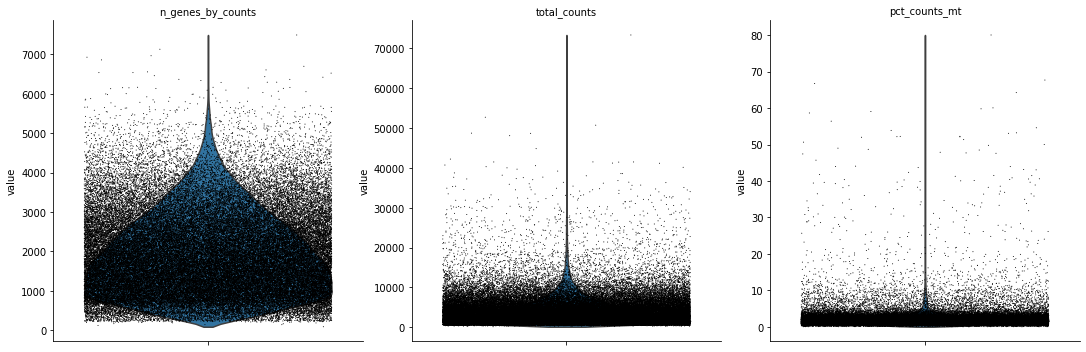

In [7]:
#plot the mitochondrial data
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [8]:
# make variables and observations unique
adata.var_names_make_unique()
adata.obs_names_make_unique()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


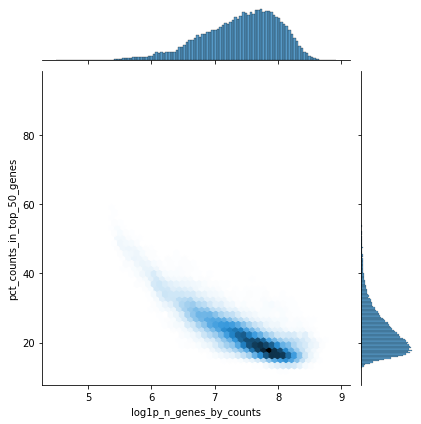

In [9]:
# plot the logaritmized number of genes by counts and the percentage of counts that express the top 50 most expressed genes
sns.jointplot('log1p_n_genes_by_counts', 'pct_counts_in_top_50_genes', data=adata.obs, kind="hex")

# do the actual filtering to exclude cells 
adata = adata[adata.obs.pct_counts_mt < 30, :] # include cells with low mithochondrial expression
adata = adata[adata.obs.pct_counts_in_top_50_genes < 50, :] # filter cells with distributed gene counts
adata = adata[adata.obs.log1p_n_genes_by_counts > 6.0, :] # filter cells with broad gene capture

In [10]:
# normalize the number of reads per cell to the median number of reads
sc.pp.normalize_per_cell(adata, counts_per_cell_after= adata.obs['n_counts'].median())

Trying to set attribute `.obs` of view, copying.


In [11]:
# logaritmize data
sc.pp.log1p(adata)

adata

AnnData object with n_obs × n_vars = 72667 × 27998
    obs: 'Age', 'AnalysisPool', 'AnalysisProject', 'Bucket', 'CellConc', 'Cell_Conc', 'ChipID', 'Class', 'ClassProbability_Astrocyte', 'ClassProbability_Astrocyte,Immune', 'ClassProbability_Astrocyte,Neurons', 'ClassProbability_Astrocyte,Oligos', 'ClassProbability_Astrocyte,Vascular', 'ClassProbability_Bergmann-glia', 'ClassProbability_Blood', 'ClassProbability_Blood,Vascular', 'ClassProbability_Enteric-glia', 'ClassProbability_Enteric-glia,Cycling', 'ClassProbability_Ependymal', 'ClassProbability_Ex-Neurons', 'ClassProbability_Ex-Vascular', 'ClassProbability_Immune', 'ClassProbability_Immune,Neurons', 'ClassProbability_Immune,Oligos', 'ClassProbability_Neurons', 'ClassProbability_Neurons,Cycling', 'ClassProbability_Neurons,Oligos', 'ClassProbability_Neurons,Satellite-glia', 'ClassProbability_Neurons,Vascular', 'ClassProbability_OEC', 'ClassProbability_Oligos', 'ClassProbability_Oligos,Cycling', 'ClassProbability_Oligos,Vascular', 'Cla

In [12]:
calc_celltype_observation(adata, 'TaxonomyRank4')

,number_cells
obs_name,
Cerebellum neurons,3748
Cholinergic and monoaminergic neurons,1066
Dentate gyrus granule neurons,4359
Di- and mesencephalon excitatory neurons,6439
Di- and mesencephalon inhibitory neurons,4022
Enteric neurons,999
Glutamatergic neuroblasts,638
Hindbrain neurons,1140
Non-glutamatergic neuroblasts,4780


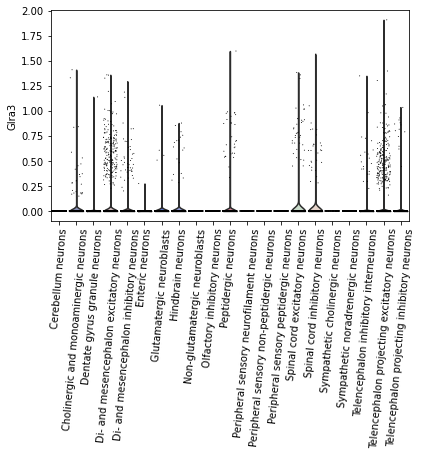

In [13]:
sc.pl.violin(adata, 'Glra3', use_raw = False, stripplot= True, jitter = 0.4, groupby = 'TaxonomyRank4', 
             rotation =85, save= 'violin_glra3_expression.pdf')

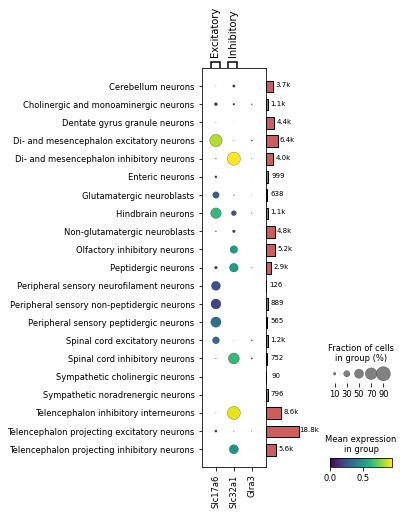

In [15]:
marker_genes = ['Slc17a6','Slc32a1','Glra3']
glyr_genes = ['Glra1', 'Glra2', 'Glra3', 'Glra4', 'Glrb']
#glyr_plot = sc.pl.dotplot(adata, marker_genes, use_raw = False, groupby = 'TaxonomyRank4')
#glyr_plot.add_totals().style(dot_edge_color = 'black', dot_edge_lw=0.5)
#glyr_plot.show()

labels = ['Excitatory', 'Inhibitory']
label_pos = [(0,0), (1,1)]

sc.pl.DotPlot(adata, marker_genes, var_group_labels =labels, var_group_positions= label_pos, 
                          use_raw = False, groupby = 'TaxonomyRank4', cmap ='viridis').add_totals(color= 'indianred').show()
#glyr_plot.add_totals()#.style(dot_edge_color = 'black', dot_edge_lw=0.5)
#glyr_plot.show()
#sc.pl.dotplot(adata, marker_genes, var_group_labels =labels, var_group_positions= label_pos, use_raw = False, groupby = 'TaxonomyRank4')

In [76]:
calc_celltype_observation(adata_glra3, "Tissue")

,number_cells
obs_name,
Amygd,32
CA1,13
Ctx1,54
Ctx1.5,5
Ctx2,9
Ctx3,87
DentGyr,1
ENS,1
HC,7


In [71]:
calc_celltype_observation(adata, 'Taxonomy_group')

,number_cells
obs_name,
Cerebellum neurons,3288
Cholinergic and monoaminergic neurons,1065
Dentate gyrus granule neurons,4357
Di- and mesencephalon excitatory neurons,6423
Di- and mesencephalon inhibitory neurons,4016
Enteric neurons,1025
Glutamatergic neuroblasts,637
Hindbrain neurons,1141
Non-glutamatergic neuroblasts,4774


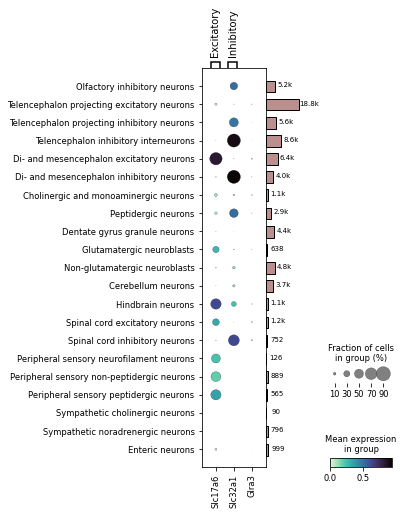

In [16]:
order_cat = ['Olfactory inhibitory neurons', 'Telencephalon projecting excitatory neurons', 'Telencephalon projecting inhibitory neurons',
             'Telencephalon inhibitory interneurons', 'Di- and mesencephalon excitatory neurons', 
             'Di- and mesencephalon inhibitory neurons', 'Cholinergic and monoaminergic neurons', 
             'Peptidergic neurons', 'Dentate gyrus granule neurons', 'Glutamatergic neuroblasts', 'Non-glutamatergic neuroblasts', 
             'Cerebellum neurons', 'Hindbrain neurons', 'Spinal cord excitatory neurons', 
             'Spinal cord inhibitory neurons', 'Peripheral sensory neurofilament neurons', 
             'Peripheral sensory non-peptidergic neurons', 'Peripheral sensory peptidergic neurons', 
             'Sympathetic cholinergic neurons', 'Sympathetic noradrenergic neurons', 'Enteric neurons']

sc.pl.DotPlot(adata, marker_genes, var_group_labels =labels, var_group_positions= label_pos, 
                          use_raw = False, groupby = 'TaxonomyRank4', categories_order= order_cat, cmap ='mako_r').add_totals(color = 'rosybrown').savefig('marker_expression_all.pdf')

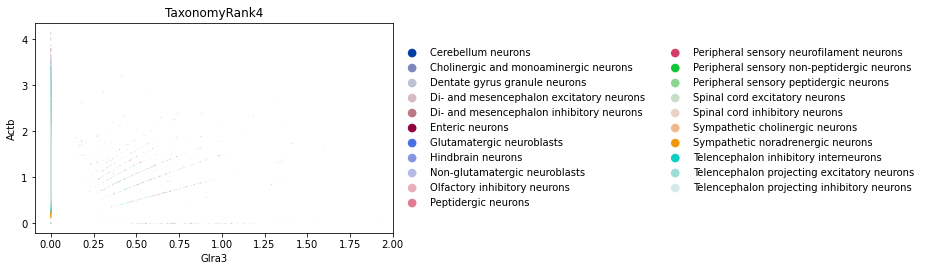

In [18]:
sc.pl.scatter(adata, x = 'Glra3', y = 'Actb', color = 'TaxonomyRank4')

In [19]:
adata.obs['glra3_cell'] = (adata[:, 'Glra3'].X > 0.1).astype(str)

In [20]:
percentage_exp(adata, glyr_genes)

[('Glrb', 32.32141136967262),
 ('Glra2', 6.25318232485172),
 ('Glra1', 3.970165274471218),
 ('Glra3', 0.8655923596680749),
 ('Glra4', 0.020642107146297495)]

In [21]:
adata_glra3 = adata[adata.obs['glra3_cell'] == 'True']
adata_glra3

View of AnnData object with n_obs × n_vars = 629 × 27998
    obs: 'Age', 'AnalysisPool', 'AnalysisProject', 'Bucket', 'CellConc', 'Cell_Conc', 'ChipID', 'Class', 'ClassProbability_Astrocyte', 'ClassProbability_Astrocyte,Immune', 'ClassProbability_Astrocyte,Neurons', 'ClassProbability_Astrocyte,Oligos', 'ClassProbability_Astrocyte,Vascular', 'ClassProbability_Bergmann-glia', 'ClassProbability_Blood', 'ClassProbability_Blood,Vascular', 'ClassProbability_Enteric-glia', 'ClassProbability_Enteric-glia,Cycling', 'ClassProbability_Ependymal', 'ClassProbability_Ex-Neurons', 'ClassProbability_Ex-Vascular', 'ClassProbability_Immune', 'ClassProbability_Immune,Neurons', 'ClassProbability_Immune,Oligos', 'ClassProbability_Neurons', 'ClassProbability_Neurons,Cycling', 'ClassProbability_Neurons,Oligos', 'ClassProbability_Neurons,Satellite-glia', 'ClassProbability_Neurons,Vascular', 'ClassProbability_OEC', 'ClassProbability_Oligos', 'ClassProbability_Oligos,Cycling', 'ClassProbability_Oligos,Vascular'

In [23]:
df_glra3 = calc_celltype_observation(adata_glra3, 'TaxonomyRank4')
df_all = calc_celltype_observation(adata, 'TaxonomyRank4')

print(df_glra3)
print(df_all)

# print the percentage of neurons from each cluster expressing Glra3
print(df_glra3.div(df_all)*100)

                                             number_cells
obs_name                                                 
Cholinergic and monoaminergic neurons                  26
Dentate gyrus granule neurons                           1
Di- and mesencephalon excitatory neurons              197
Di- and mesencephalon inhibitory neurons               43
Enteric neurons                                         1
Glutamatergic neuroblasts                               4
Hindbrain neurons                                      18
Peptidergic neurons                                    29
Spinal cord excitatory neurons                         35
Spinal cord inhibitory neurons                         28
Telencephalon inhibitory interneurons                  21
Telencephalon projecting excitatory neurons           212
Telencephalon projecting inhibitory neurons            14
                                             number_cells
obs_name                                                 
Cerebellum neu

/opt/anaconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'glra3_cell' as categorical


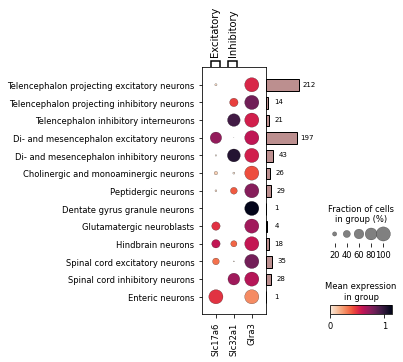

In [24]:
order_cat_glra3 = ['Telencephalon projecting excitatory neurons', 'Telencephalon projecting inhibitory neurons',
             'Telencephalon inhibitory interneurons', 'Di- and mesencephalon excitatory neurons', 
             'Di- and mesencephalon inhibitory neurons', 'Cholinergic and monoaminergic neurons', 
             'Peptidergic neurons', 'Dentate gyrus granule neurons', 'Glutamatergic neuroblasts', 
             'Hindbrain neurons', 'Spinal cord excitatory neurons', 
             'Spinal cord inhibitory neurons', 'Enteric neurons']
labels = ['Excitatory', 'Inhibitory']
label_pos = [(0,0), (1,1)]

sc.pl.DotPlot(adata_glra3, marker_genes, var_group_labels =labels, var_group_positions= label_pos, 
                          use_raw = False, groupby = 'TaxonomyRank4', categories_order= order_cat_glra3, cmap = 'rocket_r').add_totals(color = 'rosybrown').savefig('marker_expression_glra3_cells.pdf')

In [25]:
percentage_exp(adata_glra3, marker_genes)

[('Glra3', 100.0),
 ('Slc17a6', 31.63751987281399),
 ('Slc32a1', 16.85214626391097)]

In [26]:
calc_celltype_observation(adata, 'Sex')

,number_cells
obs_name,
1F,13538
1M,4190
1M 1F,10503
1M 2F,839
2M,6
2M 1F,4698
2M 2F,1309
?,1088
F,16426


In [27]:
calc_celltype_observation(adata_glra3, 'Sex')

,number_cells
obs_name,
1F,65
1M,119
1M 1F,157
1M 2F,3
2M 1F,15
2M 2F,1
?,14
F,111
M,143
